## Homework 1.3.1 - Pythagorean Problem

Consider three bodies of mass, $m1 = 3$, $m_2 = 4$, and $m_3 = 5$, located coordinate $(x, y)$ at $(1, 3)$, $(-2, -1)$ and $(1, -1)$ respectively. All are initially at rest. The interaction between particles are given by Newton's second law of motion and Newton's gravitational law:

$${{\vec F}_i} = {m_i}{a_i} =  - G\sum\limits_{i \ne j} {{m_i}{m_j}\frac{{{{\vec r}_i} - {{\vec r}_j}}}{{{{\left| {{{\vec r}_i} - {{\vec r}_j}} \right|}^3}}}} $$

Using $G = 4 \pi^2$, investigate the motion of the particles from $t = 0$ to $t = 10$

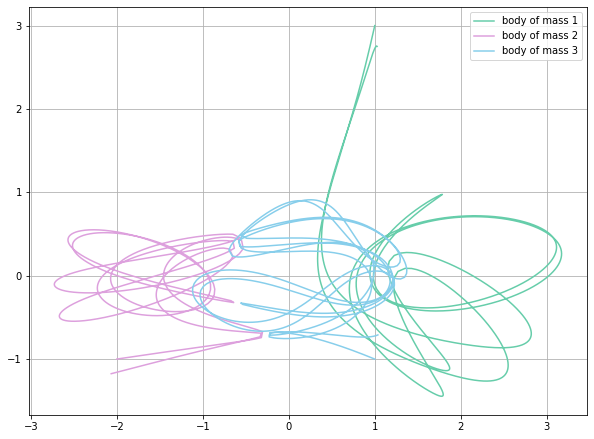

In [1]:
from math import pi, sqrt
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

G = 4*pi**2
ms = [3,4,5]

v_init = [1, 3, -2, -1, 1, -1, 0, 0, 0, 0, 0, 0]

def rhs(v, t):
    r = np.reshape(v[:-6], (3, 2))
    def inside_summation(mj, r_i, r_j):
        difference = r_i - r_j
        norm = sqrt(difference[0]**2 + difference[1]**2)
        return -G*mj*(r_i-r_j)/norm**3
    to_return = v[-6:]
    for i in range(3):
        to_return = np.append(to_return, sum([inside_summation(ms[j], r[i], r[j])[0] for j in range(3) if j != i]))
        to_return = np.append(to_return, sum([inside_summation(ms[j], r[i], r[j])[1] for j in range(3) if j != i]))
    return to_return

t5 = np.arange(0, 5.0, 0.002)
v5 = odeint(rhs, v_init, t5)
plt.figure(figsize=(10,7.5))
plt.plot(v5[:, 0], v5[:, 1], color="mediumaquamarine", label="body of mass 1")
plt.plot(v5[:, 2], v5[:, 3], color="plum", label="body of mass 2")
plt.plot(v5[:, 4], v5[:, 5], color="skyblue", label="body of mass 3")
plt.grid()
plt.legend()

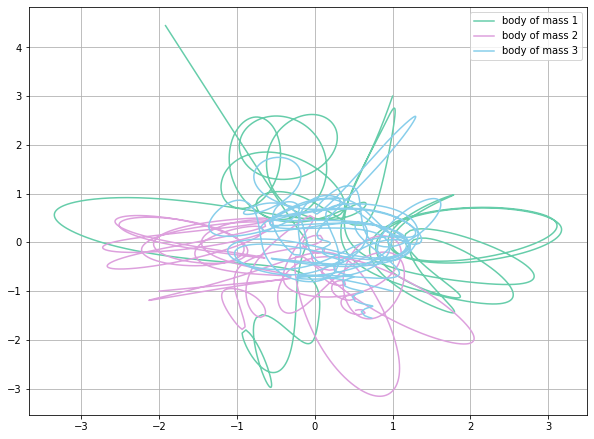

In [2]:
t10 = np.arange(0, 10.0, 0.002)
v10 = odeint(rhs, v_init, t10)
plt.figure(figsize=(10,7.5))
plt.plot(v10[:, 0], v10[:, 1], color="mediumaquamarine", label="body of mass 1")
plt.plot(v10[:, 2], v10[:, 3], color="plum", label="body of mass 2")
plt.plot(v10[:, 4], v10[:, 5], color="skyblue", label="body of mass 3")
plt.grid()
plt.legend()

___
## Homework 1.3.2 - Double Pendulum
![alt text](images/double-pendulum.png "Double Pendulum")

The equations of motion for the double pendulum are given by [from http://scienceworld.wolfram.com/physics/DoublePendulum.html]:

$$({m_1} + {m_2}){l_1}{{\ddot \theta }_1} + {m_2}{l_2}{{\ddot \theta }_2}\cos ({\theta _1} - {\theta _2}) + {m_2}{l_2}{({{\dot \theta }_2})^2}\sin ({\theta _1} - {\theta _2}) + ({m_1} + {m_2})g\sin {\theta _1} = 0$$

$${m_2}{l_2}{{\ddot \theta }_2} + {m_2}{l_1}{{\ddot \theta }_1}\cos ({\theta _1} - {\theta _2}) - {m_2}{l_1}{({{\dot \theta }_1})^2}\sin ({\theta _1} - {\theta _2}) + {m_2}g\sin {\theta _2} = 0$$

Given that $l_1 = 1$, $l_2 = 2$, $m_1 = 2$, $m_2 = 1$ and $g = 9.8$ $m/s^2$

The initial conditions at $t = 0$ are:

${{\theta }_1}(0) = 1.5$

${{\dot \theta }_1}(0) = 0$

${{\theta }_2}(0) = 3.0$

${{\dot \theta }_2}(0) = 0.0$

Write a program to plots the positions of the mass $m_2$ in $x-y$ coordinate over the time interval $0 \le t \le T\; s$. Where $T$ are:

a) 10

b) 100

$$({m_1} + {m_2}){l_1}{{\ddot \theta }_1} + {m_2}{l_2}{{\ddot \theta }_2}\cos ({\theta _1} - {\theta _2}) + {m_2}{l_2}{({{\dot \theta }_2})^2}\sin ({\theta _1} - {\theta _2}) + ({m_1} + {m_2})g\sin {\theta _1} = 0 \\
({m_1} + {m_2}){l_1}{{\ddot \theta }_1} + {m_2}{l_2}{{\ddot \theta }_2}\cos ({\theta _1} - {\theta _2}) = - {m_2}{l_2}{({{\dot \theta }_2})^2}\sin ({\theta _1} - {\theta _2}) - ({m_1} + {m_2})g\sin {\theta _1}$$

$${m_2}{l_2}{{\ddot \theta }_2} + {m_2}{l_1}{{\ddot \theta }_1}\cos ({\theta _1} - {\theta _2}) - {m_2}{l_1}{({{\dot \theta }_1})^2}\sin ({\theta _1} - {\theta _2}) + {m_2}g\sin {\theta _2} = 0\\
{m_2}{l_2}{{\ddot \theta }_2} + {m_2}{l_1}{{\ddot \theta }_1}\cos ({\theta _1} - {\theta _2}) = {m_2}{l_1}{({{\dot \theta }_1})^2}\sin ({\theta _1} - {\theta _2}) - {m_2}g\sin {\theta _2}$$

$$
\left[ {\begin{array}{*{20}{c}}
({m_1} + {m_2}){l_1} & {m_2}{l_2}{\cos(\theta_1 - \theta_2)}\\
{m_2}{l_1}{\cos({\theta_1 - \theta_2})} & {{m_2}{l_2}}
\end{array}} \right]
\left[ {\begin{array}{*{20}{c}}
{\ddot{\theta}_1}\\
{\ddot{\theta}_2}
\end{array}} \right] =
\left[ {\begin{array}{*{20}{c}}
- {m_2}{l_2}{({{\dot \theta }_2})^2}\sin ({\theta _1} - {\theta _2}) - ({m_1} + {m_2})g\sin {\theta _1}\\
{m_2}{l_1}{({{\dot \theta }_1})^2}\sin ({\theta _1} - {\theta _2}) - {m_2}g\sin {\theta _2}
\end{array}} \right]
$$

In [3]:
from math import cos, sin
g = 9.8
l_1, l_2, m_1, m_2 = 2, 1, 2, 1

             #θ1,θ2,dθ1,dθ2
theta_init = [1.5, 3, 0, 0]

def rhs_2(theta, t):
    theta_one = theta[0]
    theta_one_dot = theta[2]
    theta_two = theta[1]
    theta_two_dot = theta[3]
    A = np.array([[0., 0], [0., 0]])
    b = np.array([0., 0])
    
    A[0, 0] = (m_1 + m_2)*l_1
    A[0, 1] = m_2*l_2*cos(theta_one - theta_two)
    A[1, 0] = m_2*l_1*cos(theta_one - theta_two)
    A[1, 1] = m_2*l_2
    
    b[0] = -m_2*l_2*((theta_two_dot)**2)*sin(theta_one-theta_two) - (m_1+m_2)*g*sin(theta_one)
    b[1] = m_2*l_1*((theta_one_dot)**2)*sin(theta_one-theta_two) - m_2*g*sin(theta_two)
    
    theta_one_ddot, theta_two_ddot = np.linalg.solve(A, b)
    return theta_one_dot, theta_two_dot, theta_one_ddot, theta_two_ddot

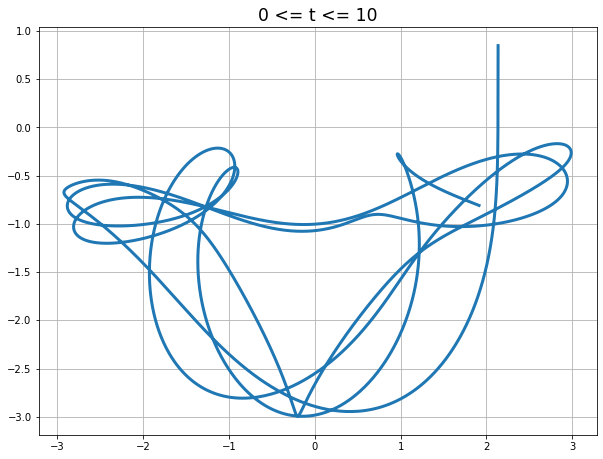

In [4]:
theta10 = odeint(rhs_2, theta_init, t10)
pos_x10 = l_1*np.sin(theta10[:,0]) + l_2*np.sin(theta10[:,1])
pos_y10 = -l_1*np.cos(theta10[:,0]) - l_2*np.cos(theta10[:,1])

plt.figure(figsize=(10,7.5))
plt.plot(pos_x10, pos_y10, lw=3)
plt.title("0 <= t <= 10", fontsize="xx-large")
plt.grid()

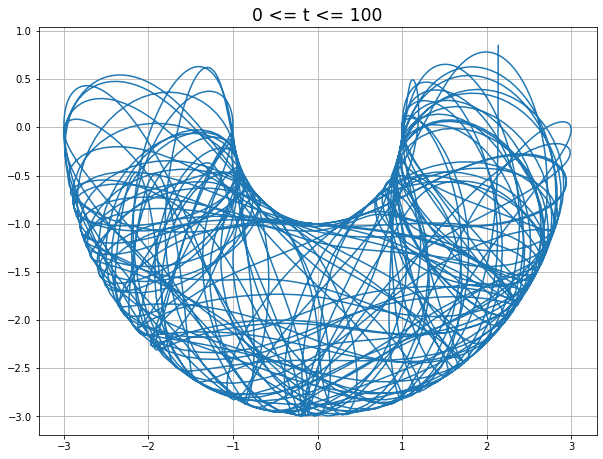

In [5]:
t100 = np.arange(0, 100.0, 0.02)

theta100 = odeint(rhs_2, theta_init, t100)
pos_x100 = l_1*np.sin(theta100[:,0]) + l_2*np.sin(theta100[:,1])
pos_y100 = -l_1*np.cos(theta100[:,0]) - l_2*np.cos(theta100[:,1])

plt.figure(figsize=(10,7.5))
plt.plot(pos_x100, pos_y100)
plt.title("0 <= t <= 100", fontsize="xx-large")
plt.grid()